Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.

Choose two continuous variables, and plot them three different ways.

Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions

Bivariate relationships

Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.

In [4]:
# import modules and read ebola csv as a dataframe
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

mwd = pd.read_csv('Minimum_Wage_Data.csv')
mwd_df = pd.DataFrame(mwd)
print('Minimum Wage Columns')
print(mwd_df.columns)
print('\n')
print('World Happiness Columns')
wh_2016 = pd.read_csv('world_happiness_2016.csv')
wh_2016 = pd.DataFrame(wh_2016)
print(wh_2016.columns)

Minimum Wage Columns
Index(['Year', 'State', 'Table_Data', 'Footnote', 'High.Value', 'Low.Value',
       'CPI.Average', 'High.2018', 'Low.2018'],
      dtype='object')


World Happiness Columns
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


In [5]:
mass = mwd_df[mwd_df['State'] == 'Massachusetts' ]
mass_low = mass[['Year','Low.Value']]


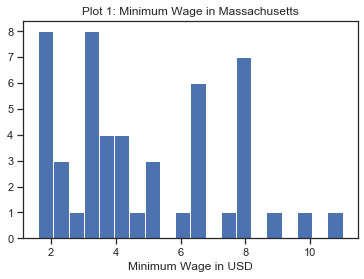

This plot isn't particularly usefule. We can see that more often than not, 
 the minimum wage was below $5, but it gives very little information.


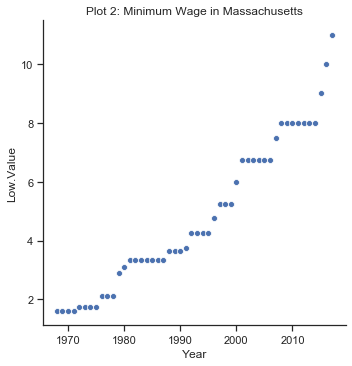

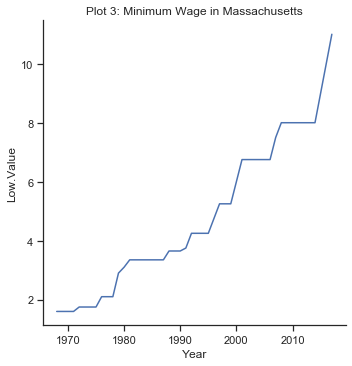

Both the scatter and ilne plots are more useful. We can see a steady increase 
 over time as well as points of stagnation.


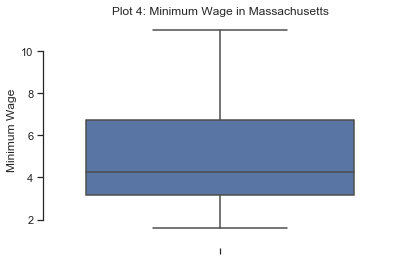

I don't feel that the boxplot is particularly useful. Similiarly to the histogram, 
 we can see that the minimum wage has at or below ~$4.


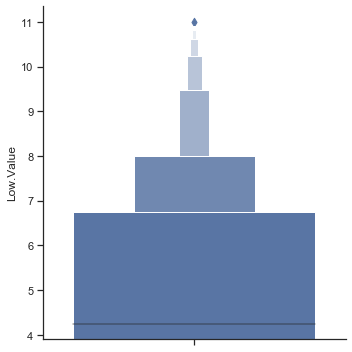

In [6]:
plt.hist(mass_low['Low.Value'], bins=20)
plt.title('Plot 1: Minimum Wage in Massachusetts')
plt.xlabel('Minimum Wage in USD')
plt.show()
print('This plot isn\'t particularly usefule. We can see that more often than not, \n the minimum wage was below $5, but it gives very little information.')

sns.relplot(x='Year', y='Low.Value', data=mass_low)
plt.title('Plot 2: Minimum Wage in Massachusetts')
plt.show()

sns.relplot(x='Year', y='Low.Value', data=mass_low, kind='line')
plt.title('Plot 3: Minimum Wage in Massachusetts')
plt.show()

print('Both the scatter and ilne plots are more useful. We can see a steady increase \n over time as well as points of stagnation.')

ax = sns.boxplot(y='Low.Value',data=mass_low)  
plt.title('Plot 4: Minimum Wage in Massachusetts')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Minimum Wage')
plt.show()

print('I don\'t feel that the boxplot is particularly useful. Similiarly to the histogram, \n we can see that the minimum wage has at or below ~$4.')

sns.catplot(y='Low.Value', kind='boxen', data=mass_low)

In [7]:
# Choose two continuous variables, and plot them three different ways.
hap_score = wh_2016[['Happiness Score']]
trust = wh_2016[['Trust (Government Corruption)']]
print(hap_score[:5])
print(trust[:5])

   Happiness Score
0            7.526
1            7.509
2            7.501
3            7.498
4            7.413
   Trust (Government Corruption)
0                        0.44453
1                        0.41203
2                        0.14975
3                        0.35776
4                        0.41004


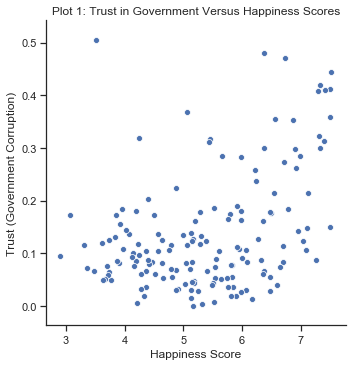

I like this plot, I think it gives us a good idea of the correlation between how 
 much trust a people has in its government and their perceived notion of happiness.


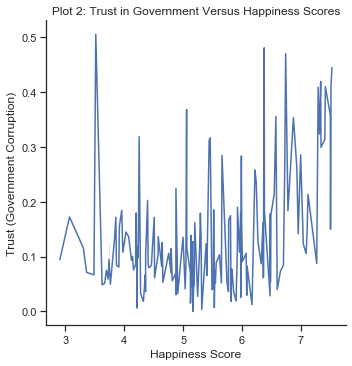

This plot has a lot going on. While we can see the correlation, it's too busy and 
 simply not a good option for the data.


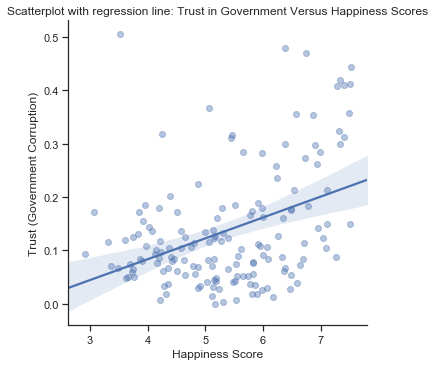

Though this plot is similar to the first, it's a bit more informatative. We can 
 see that thee is definitely a positive correlation between trust and happiness scores.
I'd definitely like to see other options (a histogram in particular) for plotting this type of data.


In [8]:
sns.relplot(x='Happiness Score', y='Trust (Government Corruption)', data=wh_2016)
plt.title('Plot 1: Trust in Government Versus Happiness Scores')
plt.show()
print('I like this plot, I think it gives us a good idea of the correlation between how \n much trust a people has in its government and their perceived notion of happiness.')


sns.relplot(x='Happiness Score', y='Trust (Government Corruption)', data=wh_2016, kind='line')
plt.title('Plot 2: Trust in Government Versus Happiness Scores')
plt.show()
print('This plot has a lot going on. While we can see the correlation, it\'s too busy and \n simply not a good option for the data.')

sns.lmplot(x='Happiness Score', y='Trust (Government Corruption)', data=wh_2016, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
# set_ylabels("Trust")
# set_xlabels("Happiness Score")
plt.title('Scatterplot with regression line: Trust in Government Versus Happiness Scores')
plt.show()
print('Though this plot is similar to the first, it\'s a bit more informatative. We can \n see that thee is definitely a positive correlation between trust and happiness scores.')
print('I\'d definitely like to see other options (a histogram in particular) for plotting this type of data.')




In [9]:
print(wh_2016['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [10]:
wh_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [11]:
wh_2016['Continent'] = ''
wh_2016.loc[(wh_2016['Region'] == 'Western Europe') | (wh_2016['Region'] == 'Central and Eastern Europe'), ['Continent']] = 'Europe'
wh_2016.loc[(wh_2016['Region'] == 'Australia and New Zealand') , ['Continent']] = 'Australia'
wh_2016.loc[(wh_2016['Region'] == 'Middle East and Northern Africa') | (wh_2016['Region'] == 'Sub-Saharan Africa'), ['Continent']] = 'Africa'
wh_2016.loc[(wh_2016['Region'] == 'Southeastern Asia') | (wh_2016['Region'] == 'Eastern Asia') | (wh_2016['Region'] == 'Southern Asia'), ['Continent']] = 'Asia'
wh_2016.loc[(wh_2016['Region'] == 'North America') , ['Continent']] = 'North America'
wh_2016.loc[(wh_2016['Region'] == 'Latin America and Caribbean') , ['Continent']] = 'Latin America and Caribbean'
wh_2016.head(10)



,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Continent
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,Europe
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,Europe
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,Europe
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,Europe
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,Europe
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,North America
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,Europe
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,Australia
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,Australia
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,Europe


//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Out of these three graphs, I think the most useful is the boxen. The scatterplot gives a 
        
 general sense of happiness scores over each continent and the violin graph is fairly useless. 
      
 The boxen graph does a much better job showing the distribution and provides a good look at the 
      
 central tendency.


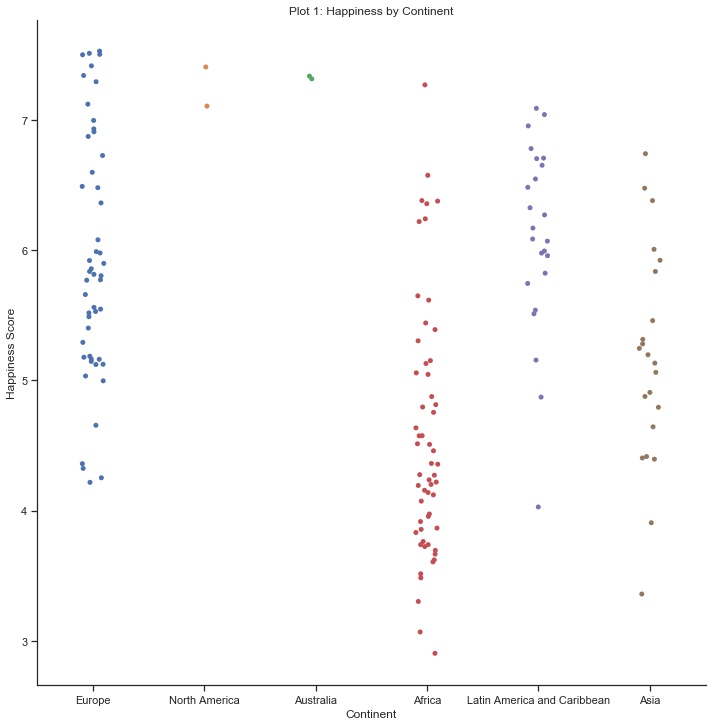

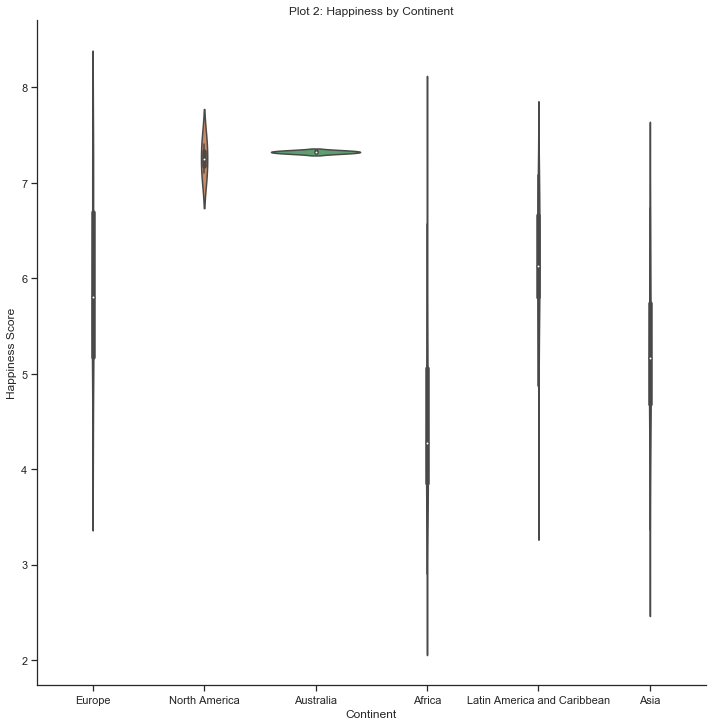

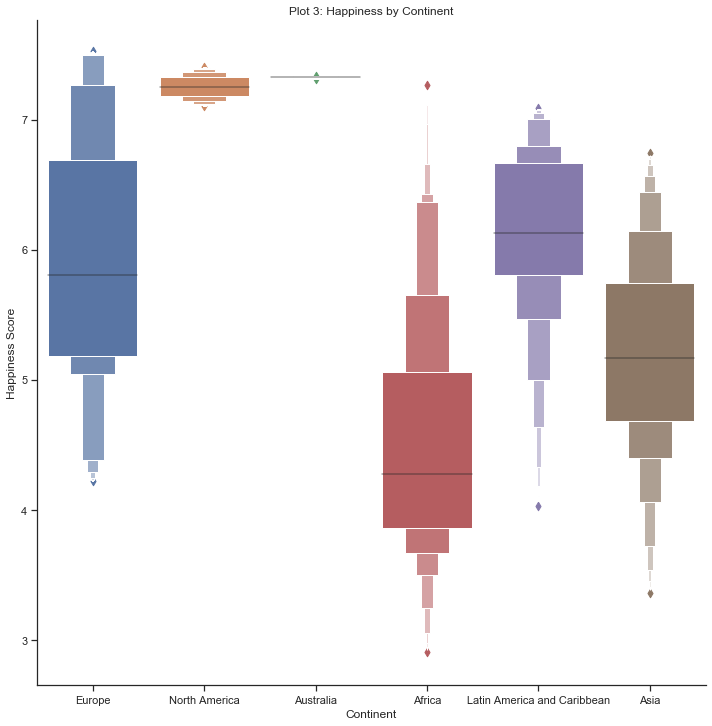

In [12]:
# Choose one continuous variable and one categorical variable, and plot them six different ways.
# Region and happiness score



scatter = sns.catplot(x='Continent', y='Happiness Score', size=10, data=wh_2016)
plt.title('Plot 1: Happiness by Continent')

violin = sns.catplot(x='Continent', y='Happiness Score', size=10, kind='violin', data=wh_2016)
plt.title('Plot 2: Happiness by Continent')

boxen = sns.catplot(x='Continent', y='Happiness Score', size=10, kind='boxen', data=wh_2016)
plt.title('Plot 3: Happiness by Continent')



print('''Out of these three graphs, I think the most useful is the boxen. The scatterplot gives a 
        \n general sense of happiness scores over each continent and the violin graph is fairly useless. 
      \n The boxen graph does a much better job showing the distribution and provides a good look at the 
      \n central tendency.''')

I don't particularly like either of these plots. The first doesn't give enough information - it's helpful to know 
 that we don't have much data on Australia and North America, but we can't see that in the dynamite plot. 
 The second plot looks very similar to the first scatter plot with the same pros and cons.


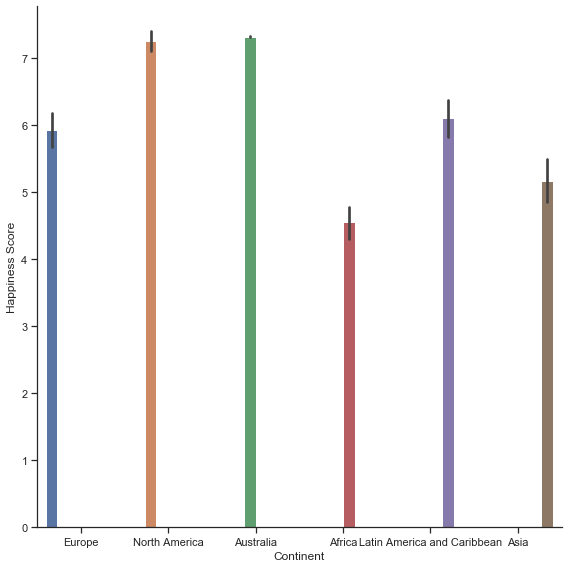

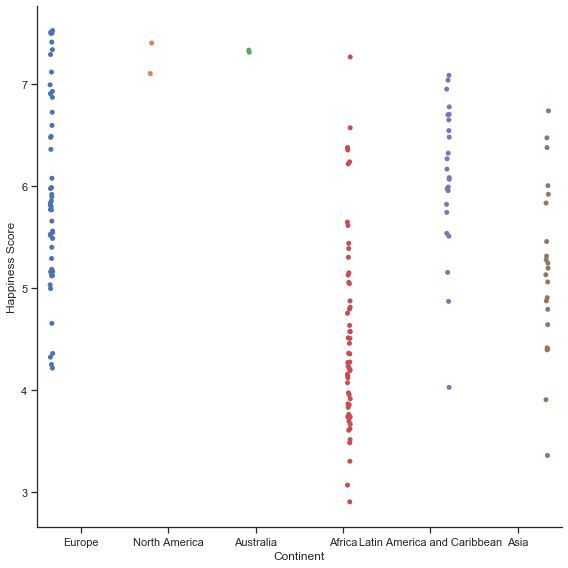

In [13]:

 

g = sns.catplot(x='Continent',y='Happiness Score', hue='Continent', size=8, data=wh_2016,

                   height=6, kind="bar", ci=95)

 

 

g = sns.catplot(x='Continent',y='Happiness Score', hue='Continent', size=8, data=wh_2016,

                   height=6, kind="strip",ci=95,dodge=True,)

print('I don\'t particularly like either of these plots. The first doesn\'t give enough information - it\'s helpful to know \n that we don\'t have much data on Australia and North America, but we can\'t see that in the dynamite plot. \n The second plot looks very similar to the first scatter plot with the same pros and cons.')
                
                



I like the combination of boxplot and scatterplot, but it would be so much better if I could make it bigger. I spent 
 quite a bt of time Googling how to increase the size, but was unable to find a simple fix. I like 
 that we can see the distribution of the scores as well as clear central tendency.


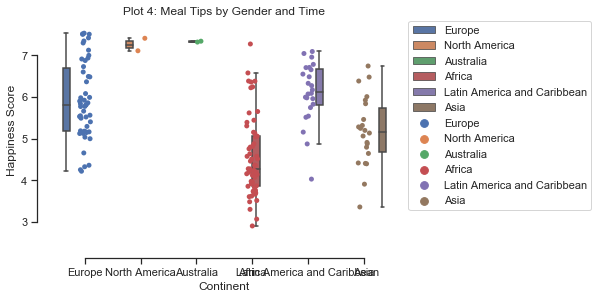

In [14]:
sns.boxplot(x='Continent',y='Happiness Score',hue='Continent', data=wh_2016, fliersize=0) 

sns.stripplot(x='Continent',y='Happiness Score',hue='Continent', data=wh_2016, )

plt.title('Plot 4: Meal Tips by Gender and Time')

sns.despine(offset=20, trim=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


print('\n')
print('I like the combination of boxplot and scatterplot, but it would be so much better if I could make it bigger. I spent \n quite a bt of time Googling how to increase the size, but was unable to find a simple fix. I like \n that we can see the distribution of the scores as well as clear central tendency.')

Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:<br>
  Probability distributions <br>
  Bivariate relationships <br>
  Whether the distributions or the relationships vary across groups<br>
  Accompany your plot with a written description of what you see.

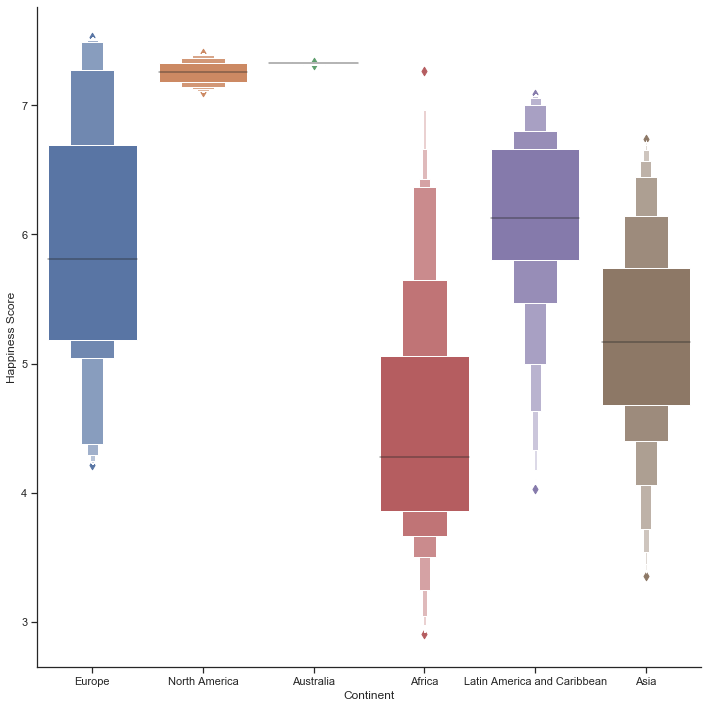

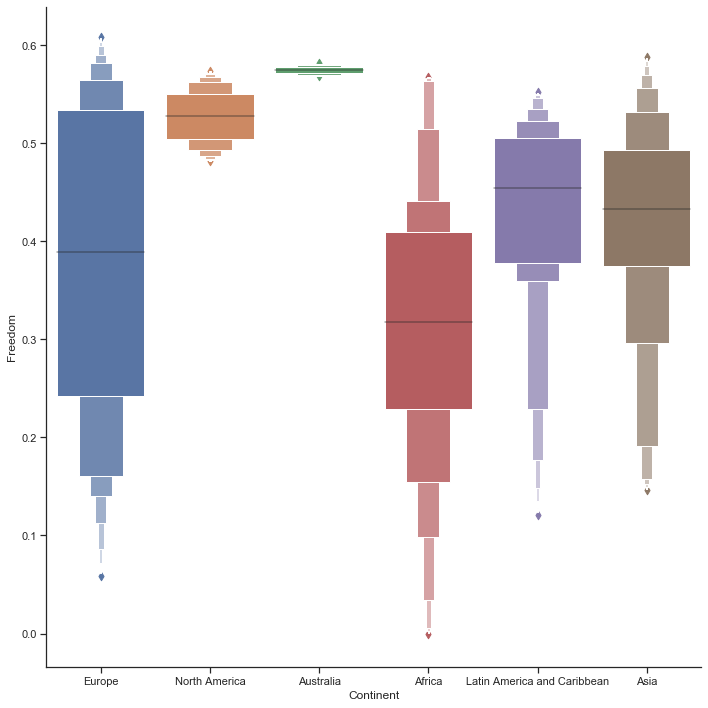

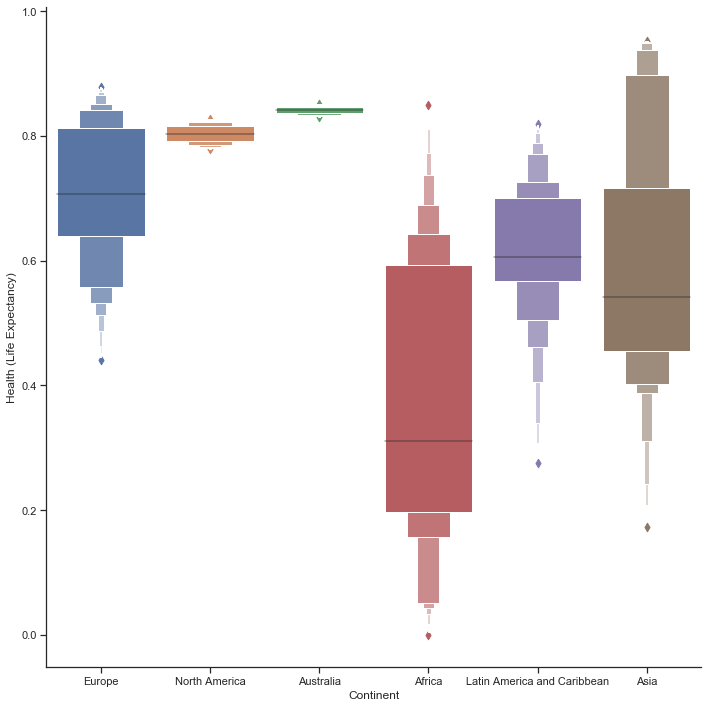

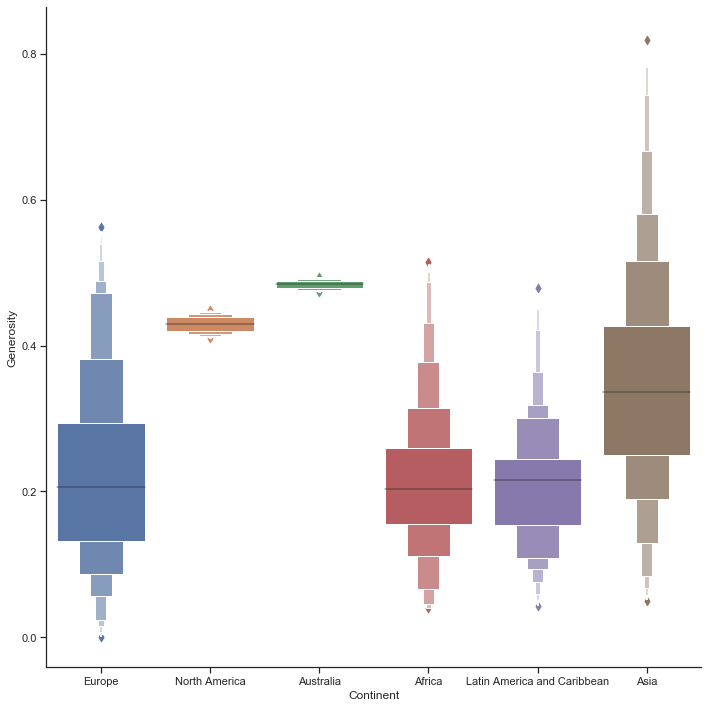

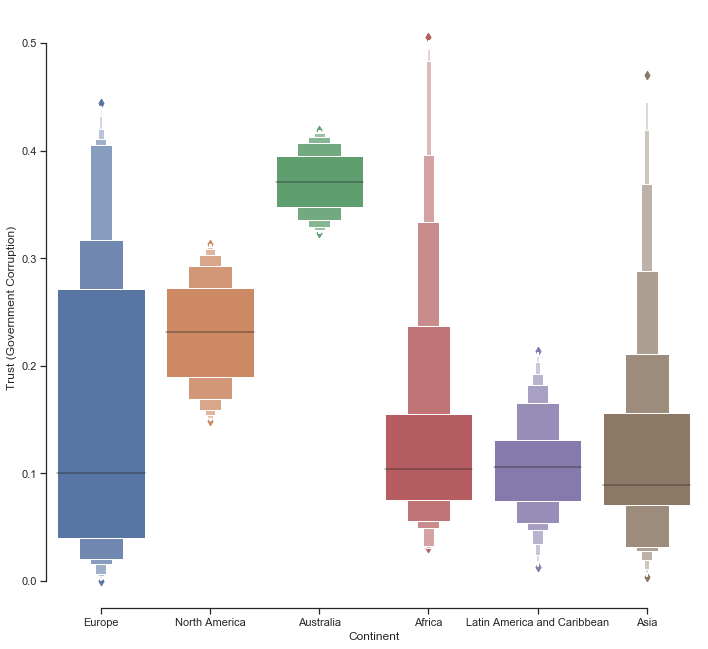

In [20]:
# health, freedom, generosity, trust

tips = sns.load_dataset("tips")

# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.

boxen = sns.catplot(x='Continent', y='Happiness Score', size=10, kind='boxen', data=wh_2016)

boxen = sns.catplot(x='Continent', y='Freedom', size=10, kind='boxen', data=wh_2016)

boxen = sns.catplot(x='Continent', y='Health (Life Expectancy)', size=10, kind='boxen', data=wh_2016)

boxen = sns.catplot(x='Continent', y='Generosity', size=10, kind='boxen', data=wh_2016)

boxen = sns.catplot(x='Continent', y='Trust (Government Corruption)', size=10, kind='boxen', data=wh_2016)

# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

These graphs give an interesting indication of what's most important to people and what affects their happiness. The health plot most closely matches the plot of happiness scores, indicating to me that health is the most important variable to happiness. This makes sense - it's much more difficult to be happy if you or your loved ones are constantly ill or if death is a regular occurrence. The graph depicting the level of freedom is also similar to the happiness graph, though there appears to be less variability. 

 

What really struck me was how different the trust and generosity graphs were from the happiness graph, but how similar they were to each other. While Latin America, Europe, Asia, and Africa rank 3, 4, 5, 6 in that order in happiness scores with distinct discrepancy. However, their central tendencies in the trust plot is extremely close. I don’t have much expertise in this region, but typically from what I’ve heard on the news (without being able to reference any specific incidents – this is purely speculative), concerns corruption in African and Latin America. It’s rare that I hear about corruption on the other two, so I’m surprised that the central tendency for perceived corruptions is essentially the same. I’d be curious to see why this is – is there more corruption in Europe than we’re lead to believe? How much influence does the press have over the public’s view of the government? Is this my own bias stepping in?

 

Finally, the generosity graph is nearly as striking as the trust graph. Europe, Africa, and Latin America all have low central tendencies, and there’s actually a country in Europe (Greece) with a generosity score of zero. Myanmar, the country with the highest generosity score, has a higher score by nearly 40% of the closest score. It’s interesting that the generosity and trust graphs don’t correlate particularly well with the happiness scores. Do these aspects not matter as much in the day-to-day lives of people?

 

It would be really cool to figure out how to graph plotting happiness scores over each of the other graphs. I’d have to change the scale so everything is out of 1 – how could I do that?